In [32]:
%matplotlib notebook
import image_registration as ir
import numpy as np
import matplotlib.pyplot as plt

def convert_to_alpha(B0,BT,S0,ST, beta):
    N0=S0/B0
    N1=ST/BT
    diff=N0-N1
    diff=np.nan_to_num(diff)
    beta=beta*np.pi/180
    alpha=(180/np.pi)*0.5*np.arcsin(diff*np.tan(beta)/2.0)
    return alpha

class Faraday_Images:
    def __init__(self, B0fn, B1fn, S0fn, S1fn):
        self.B0=plt.imread(B0fn)
        self.B1=plt.imread(B1fn)
        self.S0=plt.imread(S0fn)
        self.S1=plt.imread(S1fn)
    def register(self):
        self.BT, self.ST,self.scale, self.angle, (self.t0, self.t1)=ir.transform_like(self.B0,self.B1, self.S1)
    def convert_to_alpha(self, beta=3.0):
        self.N0=self.S0/self.B0
        self.N1=self.ST/self.BT
        diff=self.N0-self.N1
        self.diff=np.nan_to_num(diff)
        beta=beta*np.pi/180
        self.alpha=(180/np.pi)*0.5*np.arcsin(self.diff*np.tan(beta)/2.0)
    def set_origin(self, origin, x_range=11.5, y_range=8.5):
        self.origin=origin
        ymin=origin[0]-y_range*self.scale
        ymax=origin[0]+y_range*self.scale
        xmin=origin[1]-x_range*self.scale
        xmax=origin[1]+x_range*self.scale
        self.alpha_crop=self.alpha[ymin:ymax, xmin:xmax]
        self.extent=[-x_range,x_range,-y_range,y_range]
    def plot_alpha(self,clim=[-2,2], ax=None, transpose=False, cmap=plt.cm.seismic):
        if ax is None:
            fig, ax=plt.subplots(figsize=(12,8))
        d=self.alpha
        if transpose is True:
            d=np.transpose(d)
        return ax.imshow(d, cmap=cmap, interpolation='none', clim=clim, aspect=1)
    def plot_alpha_mm(self,clim=[-2,2], ax=None, transpose=False, cmap=plt.cm.seismic):
        if ax is None:
            fig, ax=plt.subplots(figsize=(12,8))
        d=self.alpha_crop
        ex=self.extent
        if transpose is True:
            d=np.transpose(d)
            ex=ex[2:4]+ex[0:2]
        return ax.imshow(d, cmap=cmap, interpolation='none', clim=clim, extent=ex, aspect=1)

# s0508_15 SS Plate

In [2]:
cd "~\Google Drive\MAGPIE\data\2015\s0508_15 RECONNECTION - Al with SS plate\s0508_15"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0508_15 RECONNECTION - Al with SS plate\s0508_15


In [3]:
B0fn="08-May-2015 14_50_25_1355463638.png"
B1fn="08-May-2015 14_50_25_2211629970.png"
S0fn="08-May-2015 15_10_19_1355463638.png"
S1fn="08-May-2015 15_10_19_2211629970.png"
SS_plate=Faraday_Images(B0fn, B1fn, S0fn, S1fn)

In [4]:
SS_plate.register()
SS_plate.convert_to_alpha()

c:\users\jdavies\anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


<IPython.core.display.Javascript object>


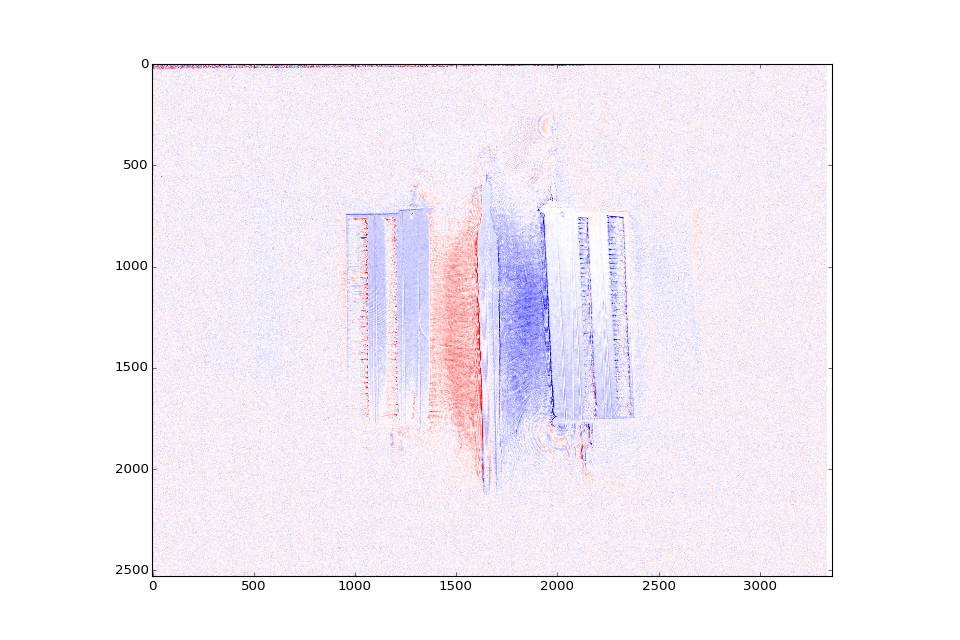

In [9]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(SS_plate.alpha, cmap=plt.cm.bwr_r, clim=[-1, 1])

# s0506_15 Al reconnection

In [2]:
cd "~\Google Drive\MAGPIE\data\2015\s0506_15 RECONNECTION\s0506_15"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0506_15 RECONNECTION\s0506_15


In [3]:
B0fn="06-May-2015 12_56_47_1355463638.png"
B1fn="06-May-2015 12_56_47_2211629970.png"
S0fn="06-May-2015 13_19_22_1355463638.png"
S1fn="06-May-2015 13_19_22_2211629970.png"
Al_recon=Faraday_Images(B0fn, B1fn, S0fn, S1fn)

In [4]:
Al_recon.register()
Al_recon.convert_to_alpha()

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: invalid value encountered in true_divide
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in arcsin


<IPython.core.display.Javascript object>


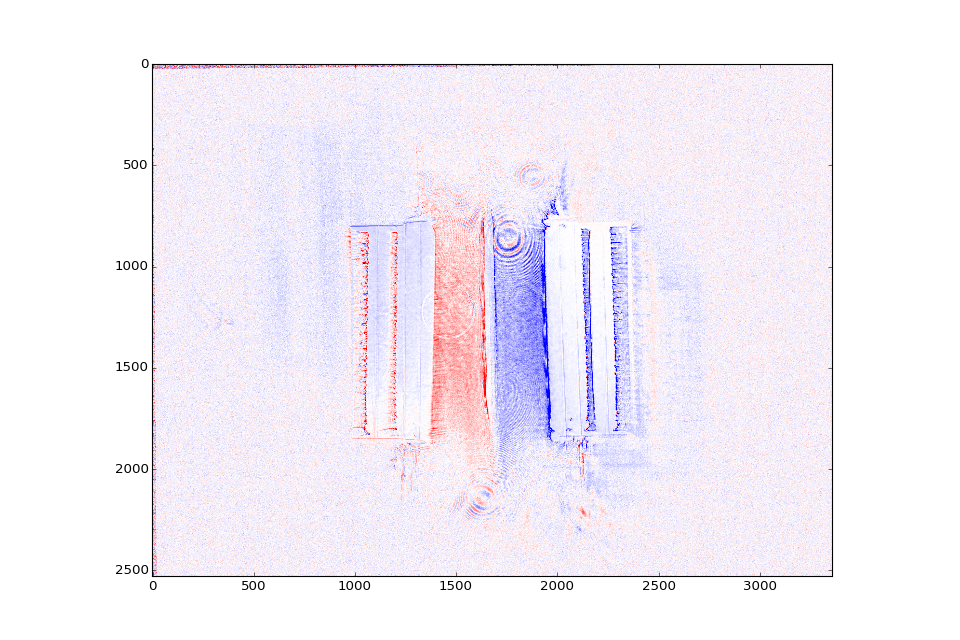

In [5]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(Al_recon.alpha, cmap=plt.cm.bwr_r, clim=[-1, 1])

<IPython.core.display.Javascript object>


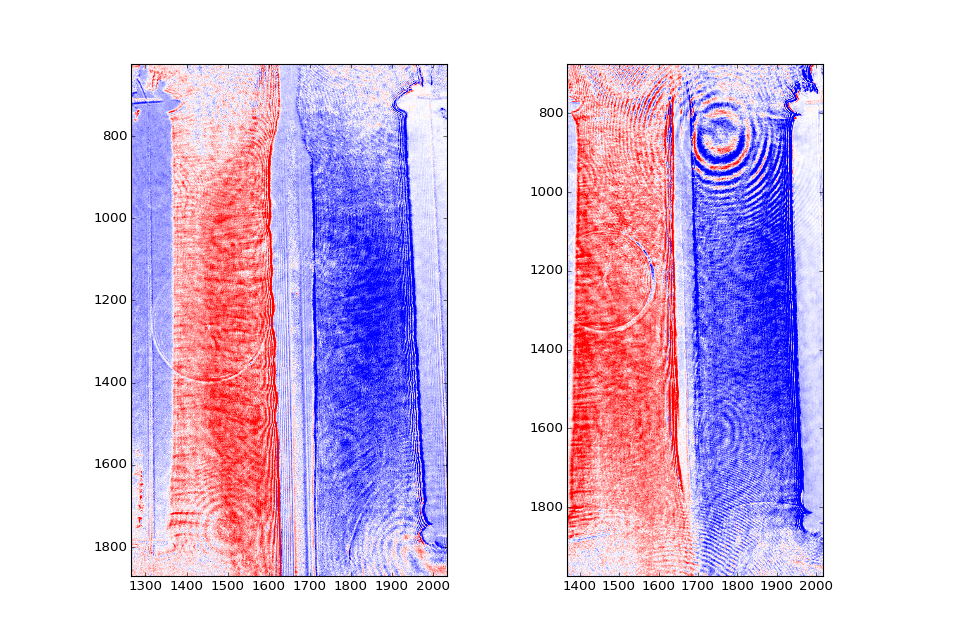

In [63]:
fig, ax=plt.subplots(1,2, figsize=(12,8))
ax[0].imshow(SS_plate.alpha, cmap=plt.cm.bwr_r, clim=[-0.5, 0.5])
ax[1].imshow(Al_recon.alpha, cmap=plt.cm.bwr_r, clim=[-1, 1])

# s0512_15 C 207 ns

In [2]:
cd "~\Google Drive\MAGPIE\data\2015\s0512_15 RECONNECTION - Carbon\s0512_15"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0512_15 RECONNECTION - Carbon\s0512_15


In [3]:
B0fn="12-May-2015 11_02_56_1355463638.png"
B1fn="12-May-2015 11_02_56_2211629970.png"
S0fn="12-May-2015 11_29_47_1355463638.png"
S1fn="12-May-2015 11_29_47_2211629970.png"
C_211=Faraday_Images(B0fn, B1fn, S0fn, S1fn)

In [4]:
C_211.register()
C_211.convert_to_alpha()

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: invalid value encountered in true_divide
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in arcsin


<IPython.core.display.Javascript object>


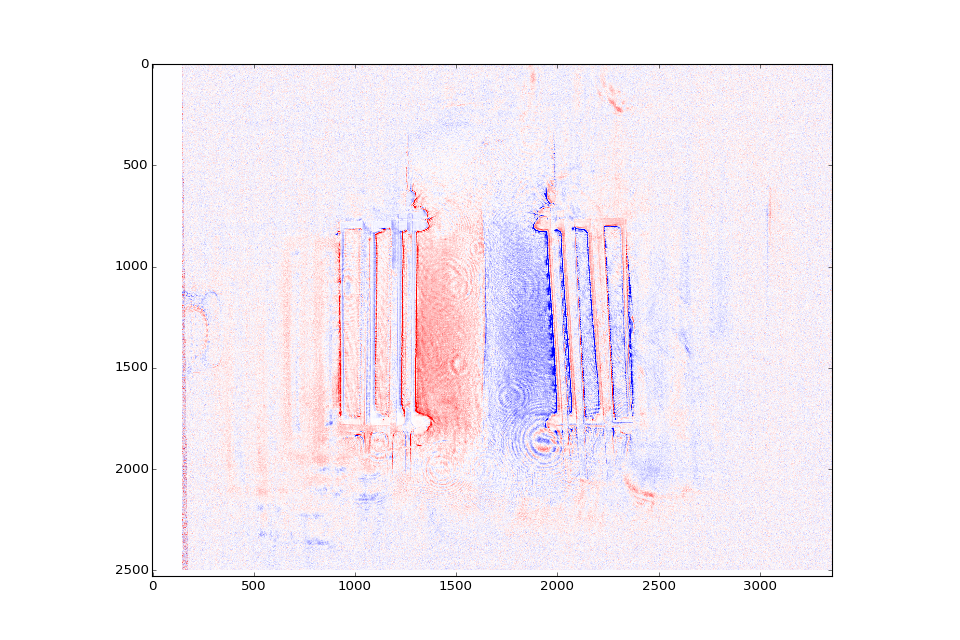

In [5]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(C_211.alpha, cmap=plt.cm.bwr_r, clim=[-1, 1])

# s0513_15 C 255 ns

In [33]:
cd "~\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat\s0513_15"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat\s0513_15


In [34]:
B0fn="13-May-2015 16_39_56_1355463638.png"
B1fn="13-May-2015 16_39_56_2211629970.png"
S0fn="13-May-2015 17_00_09_1355463638.png"
S1fn="13-May-2015 17_00_09_2211629970.png"
s0513_15=Faraday_Images(B0fn, B1fn, S0fn, S1fn)
s=s0513_15

In [35]:
s.register()
s.convert_to_alpha()

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: invalid value encountered in true_divide
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in arcsin


<IPython.core.display.Javascript object>


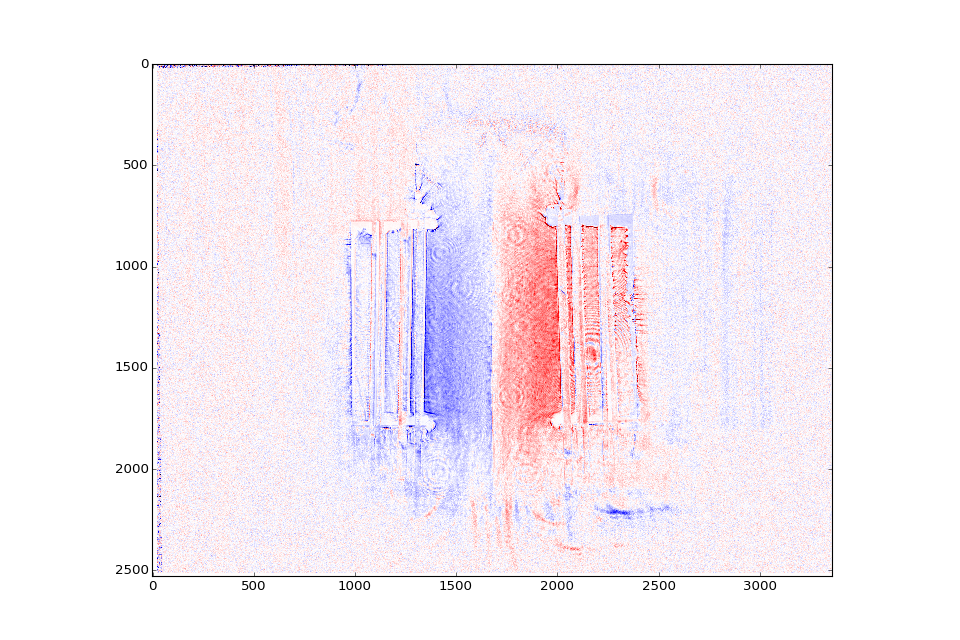

In [36]:
s.plot_alpha()

In [47]:
s.scale=66
s.set_origin((1271,1680), x_range=6.5, y_range=8.5)

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


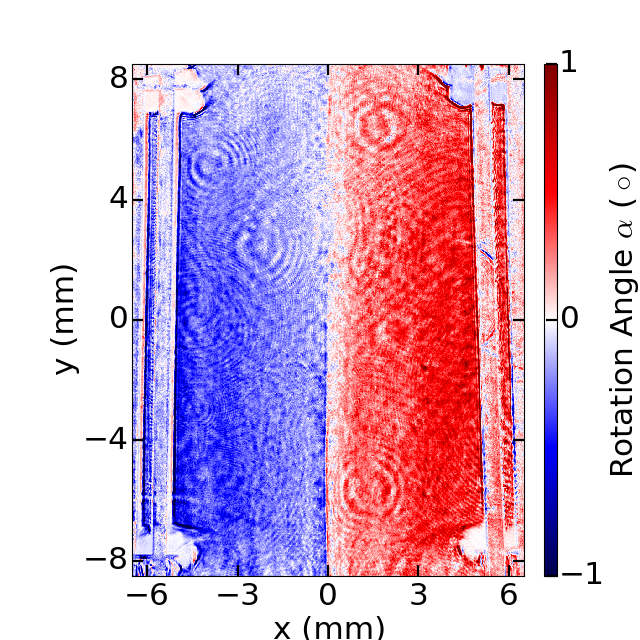

In [48]:
s=s0513_15
fig, ax=plt.subplots(figsize=(8,8))
far=s.plot_alpha_mm(ax=ax,clim=[-1,1])

ax.set_xlim([s.extent[0],s.extent[1]])
ax.set_ylim([s.extent[2],s.extent[3]])
ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('y (mm)',fontsize=28)

ax.set_xticks([-6,-3,0,3, 6])
ax.set_yticks([-8,-4,0,4,8])

ax.tick_params(labelsize=28, pad=5, length=10, width=2)

cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])#l,b,w,h
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-1,0,1])
cbar_ax.set_ylabel(r'Rotation Angle $\alpha$ ($\circ$)',fontsize=28)

#fig.suptitle(r's1026_15: $n_e L$ at 266 ns', fontsize=32)

In [49]:
fig.savefig('s0513_15 alpha map hi res.pdf', dpi=300)

In [67]:
c0=(891,1643)
c1=(1568, 1632)
dy=-c0[0]+c1[0]
dx=c0[1]-c1[1]
th=180/np.pi*np.arctan(dx/float(dy))

In [74]:
C_211.alpha_rot=rotate(np.nan_to_num(C_211.alpha), th, mode='constant',cval=0)

In [102]:
C_211.roi=C_211.alpha_rot[1400:1720,1336:1936]
C_211.int_dz=C_211.roi.mean(axis=0)

In [93]:
C_255.roi=C_255.alpha[1280:1694,1373:1972]
C_255.int_dz=C_255.roi.mean(axis=0)

c:\users\jdavies\anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


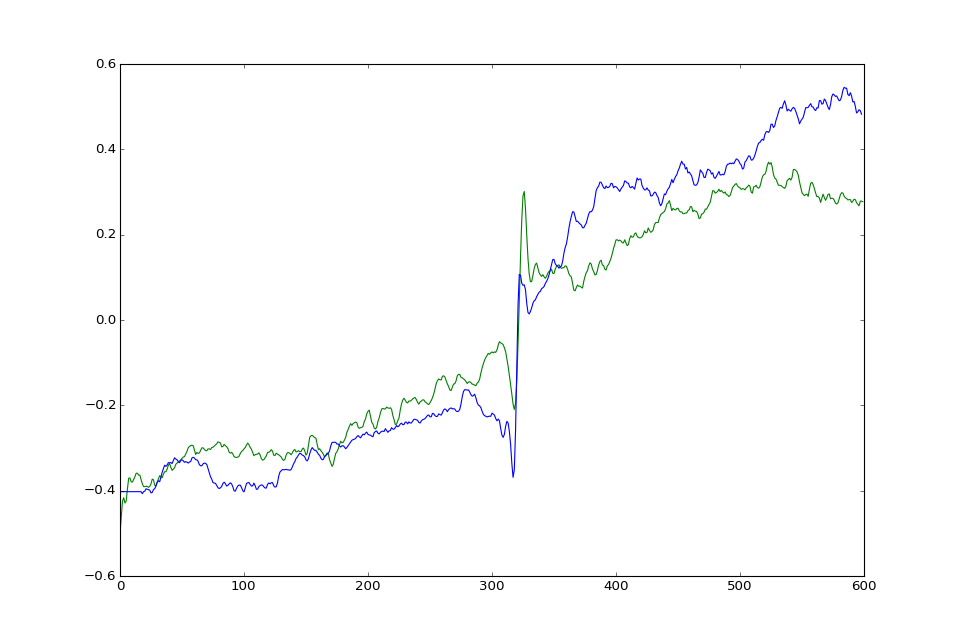

In [104]:
roll=18
C_255.int_dz_mod=np.roll(C_255.int_dz, 18)
C_255.int_dz_mod[0:roll]=C_255.int_dz_mod[roll+1]
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(C_211.int_dz, color='green')
ax.plot(C_255.int_dz_mod, color='blue')

In [ ]:
np.roll